## Yoga Pose Classification - IPML Project 

#### >> LOADING TRAINING DATA

Training data shape: (802, 224, 224)
Training labels shape: (802,)


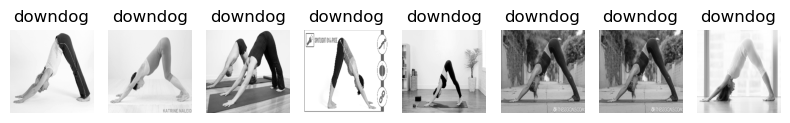

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

path = r"C:\Users\PC\Desktop\IPMLProject\yoga pose\train"
folders = ["downdog", "goddess", "plank", "tree", "warrior2"]
img_size = 224

training_data = []
training_labels = []
 
for folder in folders:
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        training_data.append(img)
        training_labels.append(folders.index(folder))
         
training_data = np.array(training_data)
training_labels = np.array(training_labels)
 
print("Training data shape:", training_data.shape)
print("Training labels shape:", training_labels.shape)

def show_images(images, labels):
    fig, axes = plt.subplots(1, 8, figsize=(8, 8))
    axes = axes.ravel()
    for i in range(len(axes)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(folders[labels[i]])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

sample_images = training_data[:10]
sample_labels = training_labels[:10]

show_images(sample_images, sample_labels)

In [38]:
training_labels.shape

(5614,)

#### >> DATA AUGMENTATION FOR MORE DATA GENERATION TO AVOID OVERFITTING

augmented data shape: (1604, 224, 224)
augmented labels shape: (1604,)


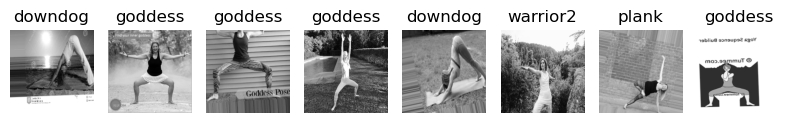

Training data shape: (5614, 224, 224)
Training labels shape: (5614,)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')
 
augmented_data = []
augmented_labels = []
 
for folder in folders:
    
    folder_path = os.path.join(path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        augmented_data.append(img)
        augmented_labels.append(folders.index(folder)) 
        img = img.reshape((1,) + img.shape + (1,))
        for batch in datagen.flow(img, batch_size=2):
            augmented_img = batch[0].reshape(img_size, img_size)
            augmented_data.append(augmented_img)
            augmented_labels.append(folders.index(folder))
            break

augmented_data = np.array(augmented_data)
augmented_labels = np.array(augmented_labels)

indices = np.arange(len(augmented_data))
np.random.shuffle(indices)
augmented_data = augmented_data[indices]
augmented_labels = augmented_labels[indices]

 
print("augmented data shape:", augmented_data.shape)
print("augmented labels shape:", augmented_labels.shape)

def show_images(images, labels):
    fig, axes = plt.subplots(1, 8, figsize=(8, 8))
    axes = axes.ravel()
    for i in range(len(axes)):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(folders[labels[i]])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

sample_images = augmented_data[:10]
sample_labels = augmented_labels[:10]

 
show_images(sample_images, sample_labels)

training_data = np.concatenate((training_data, augmented_data))
training_labels = np.concatenate((training_labels, augmented_labels))
print("Training data shape:", training_data.shape)
print("Training labels shape:", training_labels.shape)

#### >> DEFINE MODEL AND TRAIN 

In [5]:
input_shape = (img_size, img_size, 1)
 
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(folders), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_data, training_labels, epochs=5, validation_split=0.2)

Epoch 1/5
141/141 [==============================] - 324s 2s/step - loss: 1.4380 - accuracy: 0.4095 - val_loss: 1.1088 - val_accuracy: 0.5815
Epoch 2/5
141/141 [==============================] - 319s 2s/step - loss: 0.7865 - accuracy: 0.7128 - val_loss: 0.8106 - val_accuracy: 0.7017
Epoch 3/5
141/141 [==============================] - 320s 2s/step - loss: 0.3497 - accuracy: 0.8800 - val_loss: 0.8600 - val_accuracy: 0.7150
Epoch 4/5
141/141 [==============================] - 317s 2s/step - loss: 0.1058 - accuracy: 0.9666 - val_loss: 1.1023 - val_accuracy: 0.7275
Epoch 5/5
141/141 [==============================] - 314s 2s/step - loss: 0.0308 - accuracy: 0.9929 - val_loss: 1.3495 - val_accuracy: 0.7302


In [43]:
model

#### >> EVALUATE ON UNSEEN TEST DATA

15/15 [==============================] - 8s 559ms/step
[0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 3 4 1 1 1 1 1 1 1 1 1 1 4 1 1 4 1 1 2 0 1 0 2 3 1 1 4 1 0 1 1 1 1 4 3
 1 1 2 1 1 1 1 1 4 1 1 1 1 4 1 2 4 1 1 1 2 1 2 1 3 1 1 1 4 4 4 2 4 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2
 2 2 2 0 2 2 0 2 4 4 2 2 2 2 4 2 2 2 2 2 2 1 2 2 2 2 2 2 2 4 2 4 2 4 2 2 1
 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 3 1 4 2 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 4 4 2 4 4
 4 1 4 2 2 1 1 1 1 4 1 1 1 4 4 4 1 4 4 4 1 4 4 1 4 4 1 4 4 1 1 4 4 1 1 4 1
 4 1 4 4 1 1 4 4 1 1 4 1 4 4 4 4 1 1 4 4 4 1 4 2 4 1 4 4 4 1 4 4 1 4 1 4 4
 4 4 1 1 4 4 4 1 4 4 4 4 4 1 4 1 4 1 1 4 4 4 

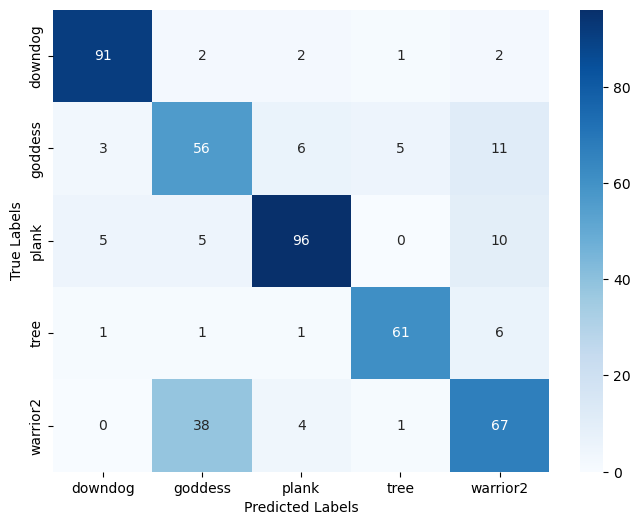

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

test_path = r"C:\Users\PC\Desktop\IPMLProject\yoga pose\test"
test_data = []
test_labels = []

for folder in folders:
    folder_path = os.path.join(test_path, folder)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (img_size, img_size))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        test_data.append(img)
        test_labels.append(folders.index(folder))

test_data = np.array(test_data)
test_labels = np.array(test_labels)

predictions = model.predict(test_data)

predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels, target_names=folders))

cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=folders, yticklabels=folders)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [7]:
print("predictions:", predictions.shape)

predictions: (475, 5)


In [41]:
len(test_labels)

475

#### >> PREDICT LABELS FOR QUERY IMAGES

1/1 [==============================] - 1s 1s/step


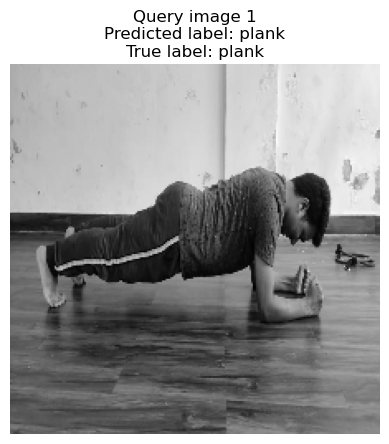

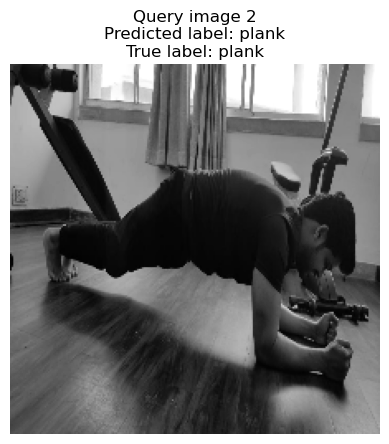

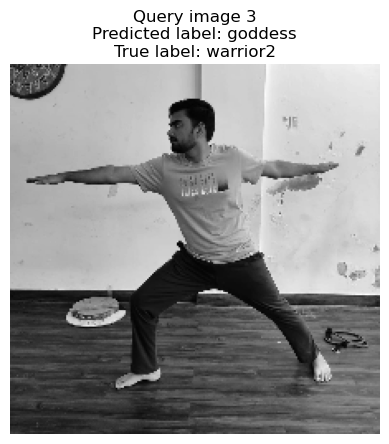

In [42]:
import random
test_path_new = r"C:\Users\PC\Desktop\IPMLProject\yoga pose\test_new"
query_images = []
query_labels = []
for i in range(3):
    folder = random.choice(folders)
    folder_path = os.path.join(test_path_new, folder)
    img_file = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (img_size, img_size))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    query_images.append(img)
    query_labels.append(folders.index(folder))
    
query_images = np.array(query_images)
query_labels = np.array(query_labels)
 
query_images = query_images.reshape(-1, img_size, img_size, 1)
predicted_labels = np.argmax(model.predict(query_images), axis=1)
import matplotlib.pyplot as plt

for i in range(3):
    predicted_label = folders[predicted_labels[i]]
    true_label = folders[query_labels[i]]
    query_image = query_images[i].reshape(img_size, img_size)
    plt.imshow(query_image, cmap='gray')
    plt.title("Query image %d\nPredicted label: %s\nTrue label: %s" % (i+1, predicted_label, true_label))
    plt.axis('off')
    plt.show()

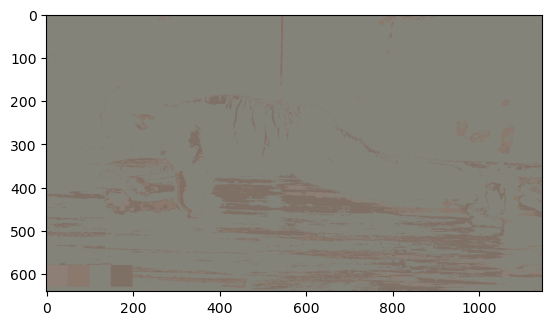

In [45]:
import numpy as np
import cv2
import random

def k_means_clustering(image, K, max_iterations=100):
    # Get image dimensions
    rows, cols, channels = image.shape

    # Initialize cluster centroids randomly
    centroids = np.array([image[random.randint(0, rows - 1), random.randint(0, cols - 1)] for _ in range(K)])

    # Initialize labels and distances
    labels = np.zeros((rows, cols), dtype=np.int32)
    distances = np.zeros((rows, cols, K), dtype=np.float32)

    # Perform K-means iterations
    for iteration in range(max_iterations):
        # Assign labels to each pixel based on the nearest centroid
        for k in range(K):
            distances[:, :, k] = np.linalg.norm(image - centroids[k], axis=2)
        labels = np.argmin(distances, axis=2)

        # Update cluster centroids
        for k in range(K):
            centroids[k] = np.mean(image[labels == k], axis=0)

    # Replace each pixel color with the nearest centroid color
    segmented_image = np.zeros_like(image)
    for k in range(K):
        segmented_image[labels == k] = centroids[k]

    return segmented_image, centroids

# Load the image
image = cv2.imread('C:/Users/PC/Desktop/IPMLProject/yoga pose/test_new/plank/plank1.jpeg')

# Apply K-means clustering
K = 4
segmented_image, centroids = k_means_clustering(image, K)

# Save the segmented image and the cluster centroids
cv2.imwrite('segmented_image.png', segmented_image)
for i, centroid in enumerate(centroids):
    centroid_image = np.zeros((50, 50, 3), dtype=np.uint8)
    centroid_image[:, :, :] = centroid.astype(np.uint8)
    x_offset = i * 50
    rows, cols, _ = image.shape
    segmented_image[rows - 60:rows - 10, x_offset:x_offset + 50, :] = centroid_image
cv2.imwrite('cluster_centroids.png', segmented_image)
# Display the image
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.show()